<a href="https://colab.research.google.com/github/syncsapro/imc2023-gibble/blob/main/HomeworkAssignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pylab as plt
import librosa.display
import IPython.display
import librosa

#import audio files
!git clone https://github.com/jcdevaney/imc2023.git

fatal: destination path 'imc2023' already exists and is not an empty directory.


In [4]:
def plotAudio3(sig,sampleRate,title):
    
    # this version expects the audio file to have already been opened by librosa
    
    # Adjust the x-axis to represent time
    time=np.arange(0,sig.shape[0])/sr
    
    # Scale the y-axis to represent amplitude from -1 to 1
    excursion=max(abs(sig))
    sigNew = sig / excursion
    
    # Label the x and y axes with variables
    xlabel = 'Time (seconds)'
    ylabel = 'Amplitude'

    # Plot the signal using the x and y axis variables    
    plt.plot(time,sigNew)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [7]:
def subplots(plotPos,title,data,time,color,ylabel,xlabel):

    #plot the inputted data into the subplot specified in the list plotPos
    plt.subplot(plotPos[0],plotPos[1],plotPos[2])
    plt.title(title)
    plt.plot(time,data,color)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

In [9]:
def makeEchoes(sig,sr,sec,echoes):

    #calculate the number of bytes which corresponds to the offset in milliseconds
    offset=int(sr*sec)
    
    #add extra space at the end for the delays
    ending = np.zeros((offset*(len(echoes))))
    
    delayedSig = np.concatenate((sig,ending))
    
    for i in range(len(echoes)):
        
        #create some silence
        # python indexes starting with zero which is why you need to add one
        beginning = np.zeros(offset*(i+1))
        
        #create delayed version of signal
        delay = np.concatenate((beginning,sig))
        delay = delay * echoes[i]

        #pad the end of delay with zeros to make it the same length as delaysedSig
        delay = np.concatenate((delay,np.zeros((delayedSig.size-delay.size))))
        
        # combine with output signal
        delayedSig = delayedSig + delay
    
    return delayedSig

In [11]:
def amplitudeModulation(sig,sr,modulatorFreq,modulatorAmp,modIndex):
    
    # create a time series from 0 to 1 the length of the inputted sig
    timeSeries = np.linspace(0, 1, len(sig))
    #create a cosine wave modulator with the time series using the inputted modulation frequency 
    #with the np.cos function and multiple it by the inputted modulation amplitude
    modulator = modulatorAmp * np.cos (2 * np.pi * modulatorFreq * timeSeries)
    #perform amplitude modulation by multiplying the inputted sig with the modulator 
    #(multiplied by 1 + modulation index)
    amMod = (1 + modIndex * modulator) * sig
    
    #create a time series to represent time for plotting
    time=np.arange(0,sig.shape[0])/sr
    
    #plot the modulator, the carrier (sig), and the result of the amplitude modulation (amMod)
    subplots([3,1,1],'Modulator signal',modulator,time,'g','Amplitude','Time')
    subplots([3,1,2],'Original (carrier) signal',sig,time,'r','Amplitude','Time')
    subplots([3,1,3],'Amplitude Modulated Signal',amMod,time,'purple','Amplitude','Time')
    
    plt.subplots_adjust(hspace=1)
    plt.rc('font', size=15)
    fig = plt.gcf()
    fig.set_size_inches(16, 9)
    
    return amMod

In [46]:
def echoAM(sig,sr,sec,echoesIndex,modulatorFreq,modulatorAmp,modIndex):
    
    plotAudio3(sig,sr,'Original Signal')

    makeEchoes(sig,sr,sec,echoes)
     
    #set the same amplitude for each delay
    echoes = [1,1,1,1]
    echoSig = makeEchoes(sig,sr,0.050,echoes)
    plotAudio3(echoSig,sr,'Delayed Signal')
    IPython.display.Audio(data=echoSig, rate=sr)   

    # Amplitude Modulation on a full signal
    sig , sr = librosa.load('imc2023/audioFiles/avm.wav')
    modSignal=amplitudeModulation(sig,sr,400,0.5,1)
    IPython.display.Audio(data=modSignal, rate=sr)

    subplots(plotPos,title,data,time,color,ylabel,xlabel)

    amplitudeModulation(sig,sr,modulatorFreq,modulatorAmp,modIndex)
    
    return amMod

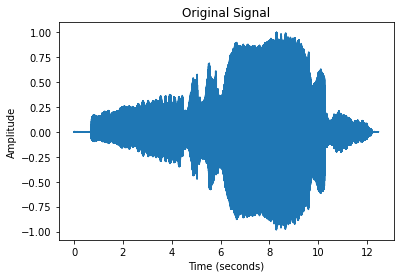

In [36]:
# load original signal
sig , sr = librosa.load('imc2023/audioFiles/avm.wav')
plotAudio3(sig,sr,'Original Signal')
IPython.display.Audio(data=sig, rate=sr)

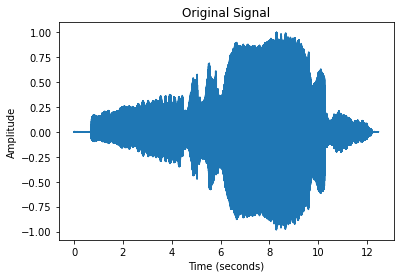

UnboundLocalError: ignored

In [47]:
echoAM(sig,sr,0.5,[1,1,1],20,0.5,1)